In [4]:
import pandas as pd
from matplotlib import pyplot as plt

from ccb.experiment import parse_results
from ccb.experiment.retrieve_runs import retrieve_runs

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## observations
* val loss and val accuracy don't start at the same step. Why?
* val accuracy can decrease over time (it doesn't always stay flat). Maybe it's a better indicator of the best hyper-parameter and the best time step.
* Val accuracy is particularly noisy
* many curves overfits right from the beginning and so2sat almost exclusively overfits
* conv4 is often not converged


In [12]:
# directory where all the sweeps experiments are logged
classification_dir =  '/mnt/data/experiments/nils/new_classification_sweeps'
segmentation_dir =  '/mnt/data/experiments/nils/new_segmentation_sweeps'

df = retrieve_runs(classification_dir)

df_1x = df[(df["partition_name"] == "1.00x_train") | (df["partition_name"] == "default")]

100%|██████████| 6018/6018 [03:02<00:00, 33.05it/s]


In [13]:
df_1x

train_loss  train_metric  val_loss  val_metric  test_loss  test_metric  \
0      0.079959      0.974691  0.071185    0.972973   0.080480     0.976226   
1      0.101115      0.967412  0.083652    0.967968   0.077324     0.976977   
2      0.073060      0.972490  0.065334    0.973724   0.072102     0.977477   
3      0.080403      0.973675  0.070581    0.970721   0.065972     0.978979   
4      0.097601      0.967073  0.093656    0.962713   0.083667     0.972472   
..          ...           ...       ...         ...        ...          ...   
801    3.747882      0.119971  4.056734    0.073715   4.032224     0.082634   
802    0.469214      0.637281  0.495251    0.640016   0.493729     0.644956   
803    0.542678      0.601609  0.571045    0.605407   0.556765     0.613337   
804    0.465519      0.638030  0.491907    0.634045   0.489571     0.637473   
805    0.521417      0.616638  0.526968    0.624311   0.522667     0.631576   

     epoch     unix_time                dataset                     model  \
0     20.0   6121.708844  pv4ger_classification  swinv2_tiny_window16_256   
1     12.0   3693.623021  pv4ger_classification  swinv2_tiny_window16_256   
2      9.0   2645.520829  pv4ger_classification  swinv2_tiny_window16_256   
3      9.0   2717.509231  pv4ger_classification  swinv2_tiny_window16_256   
4     14.0   3839.064050  pv4ger_classification  swinv2_tiny_window16_256   
..     ...           ...                    ...                       ...   
801    8.0   2849.815553       geolifeclef-2022  swinv2_tiny_window16_256   
802   34.0   7725.725115            bigearthnet  swinv2_tiny_window16_256   
803   44.0  10155.640990            bigearthnet  swinv2_tiny_window16_256   
804   12.0   2748.585290            bigearthnet  swinv2_tiny_window16_256   
805    8.0   1808.454783            bigearthnet  swinv2_tiny_window16_256   

    partition_name       benchmark_name batch_size  \
0          default  classification_v0.6          8   
1          default  classification_v0.6          8   
2          default  classification_v0.6          8   
3          default  classification_v0.6          8   
4          default  classification_v0.6         16   
..             ...                  ...        ...   
801        default  classification_v0.6         16   
802        default  classification_v0.6         16   
803        default  classification_v0.6         16   
804        default  classification_v0.6         16   
805        default  classification_v0.6         16   

                                               exp_dir  \
0    /mnt/data/experiments/nils/new_classification_...   
1    /mnt/data/experiments/nils/new_classification_...   
2    /mnt/data/experiments/nils/new_classification_...   
3    /mnt/data/experiments/nils/new_classification_...   
4    /mnt/data/experiments/nils/new_classification_...   
..                                                 ...   
801  /mnt/data/experiments/nils/new_classification_...   
802  /mnt/data/experiments/nils/new_classification_...   
803  /mnt/data/experiments/nils/new_classification_...   
804  /mnt/data/experiments/nils/new_classification_...   
805  /mnt/data/experiments/nils/new_classification_...   

                                           csv_log_dir  
0    /mnt/data/experiments/nils/new_classification_...  
1    /mnt/data/experiments/nils/new_classification_...  
2    /mnt/data/experiments/nils/new_classification_...  
3    /mnt/data/experiments/nils/new_classification_...  
4    /mnt/data/experiments/nils/new_classification_...  
..                                                 ...  
801  /mnt/data/experiments/nils/new_classification_...  
802  /mnt/data/experiments/nils/new_classification_...  
803  /mnt/data/experiments/nils/new_classification_...  
804  /mnt/data/experiments/nils/new_classification_...  
805  /mnt/data/experiments/nils/new_classification_...  

[806 rows x 15 columns]

806
['pv4ger_classification' 'forestnet_v1.0' 'eurosat' 'brick_kiln_v1.0'
 'so2sat' 'geolifeclef-2022' 'bigearthnet']
['swinv2_tiny_window16_256' 'conv4' 'resnet18' 'resnet50' 'convnext_base'
 'vit_tiny_patch16_224' 'vit_small_patch16_224']
pv4ger_classification
forestnet_v1.0
eurosat
brick_kiln_v1.0
so2sat
geolifeclef-2022
bigearthnet


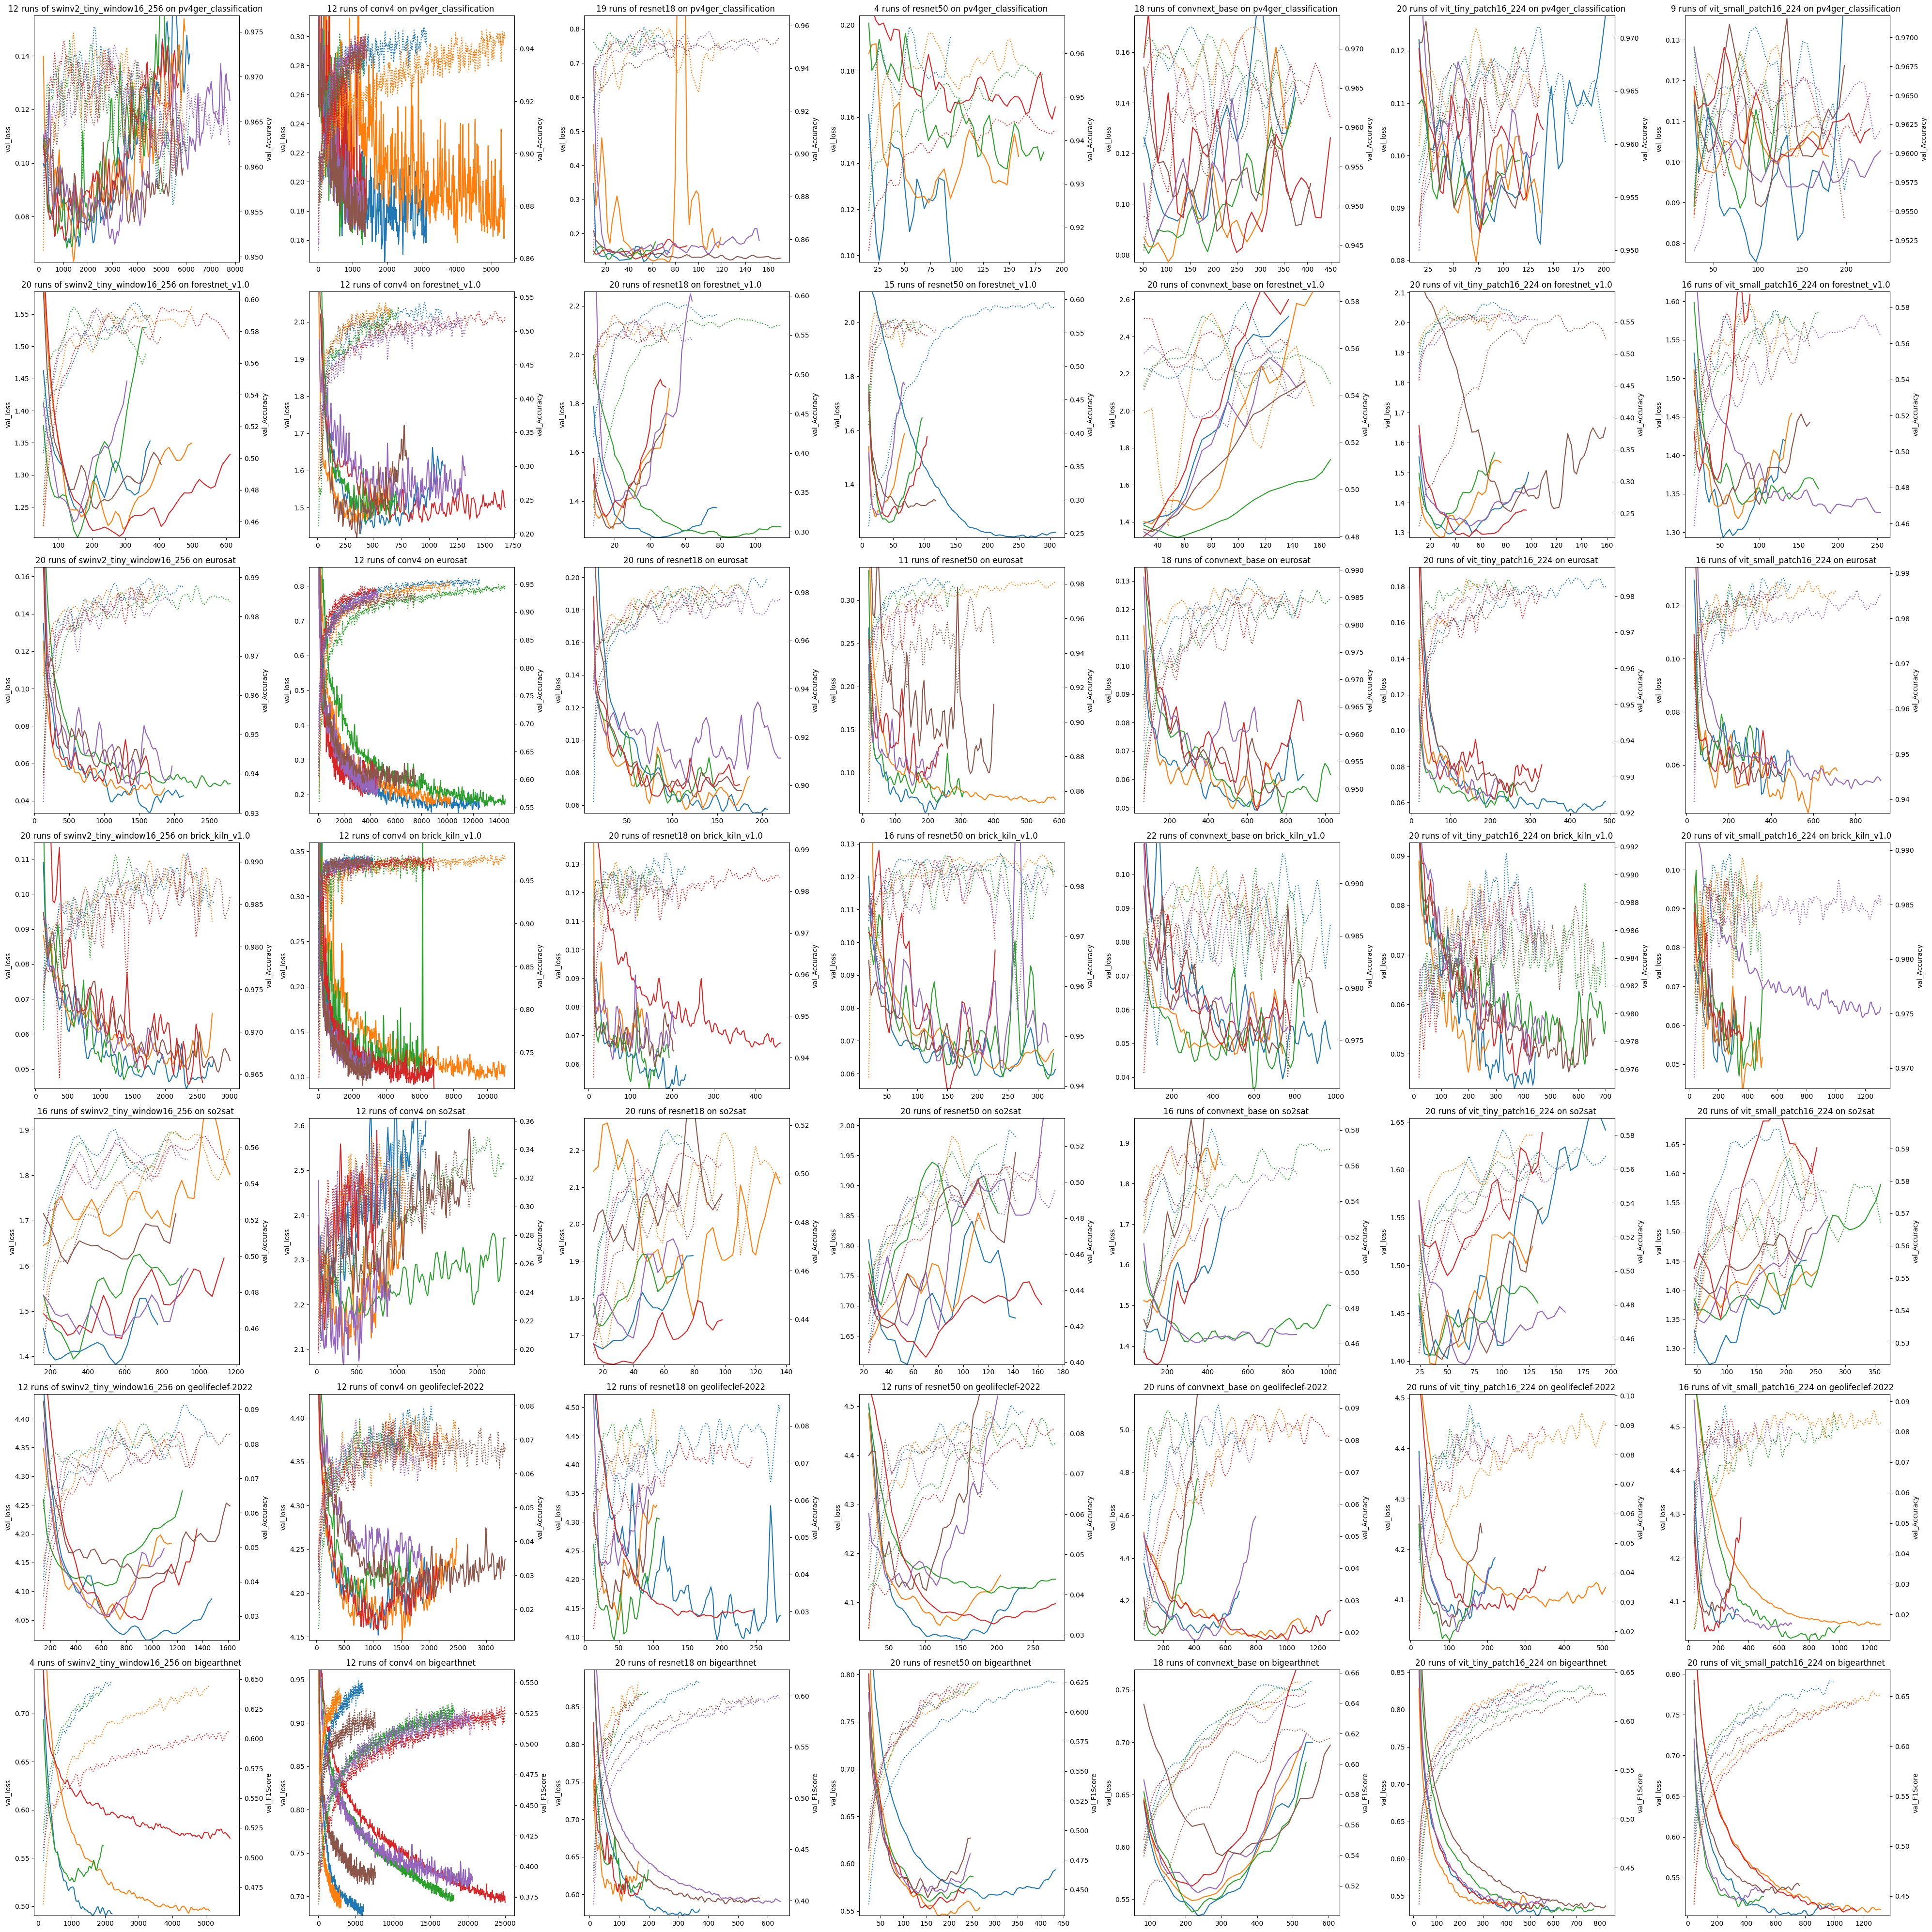

In [14]:
plt.rcParams['figure.figsize'] = [40, 40]

df_1x = df[(df["partition_name"] == "1.00x_train") | (df["partition_name"] == "default")]
parse_results.plot_all_models_datasets(df_1x)
plt.tight_layout()


pv4ger_classification


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


forestnet_v1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


eurosat


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


brick_kiln_v1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


so2sat


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


geolifeclef-2022


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


bigearthnet


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


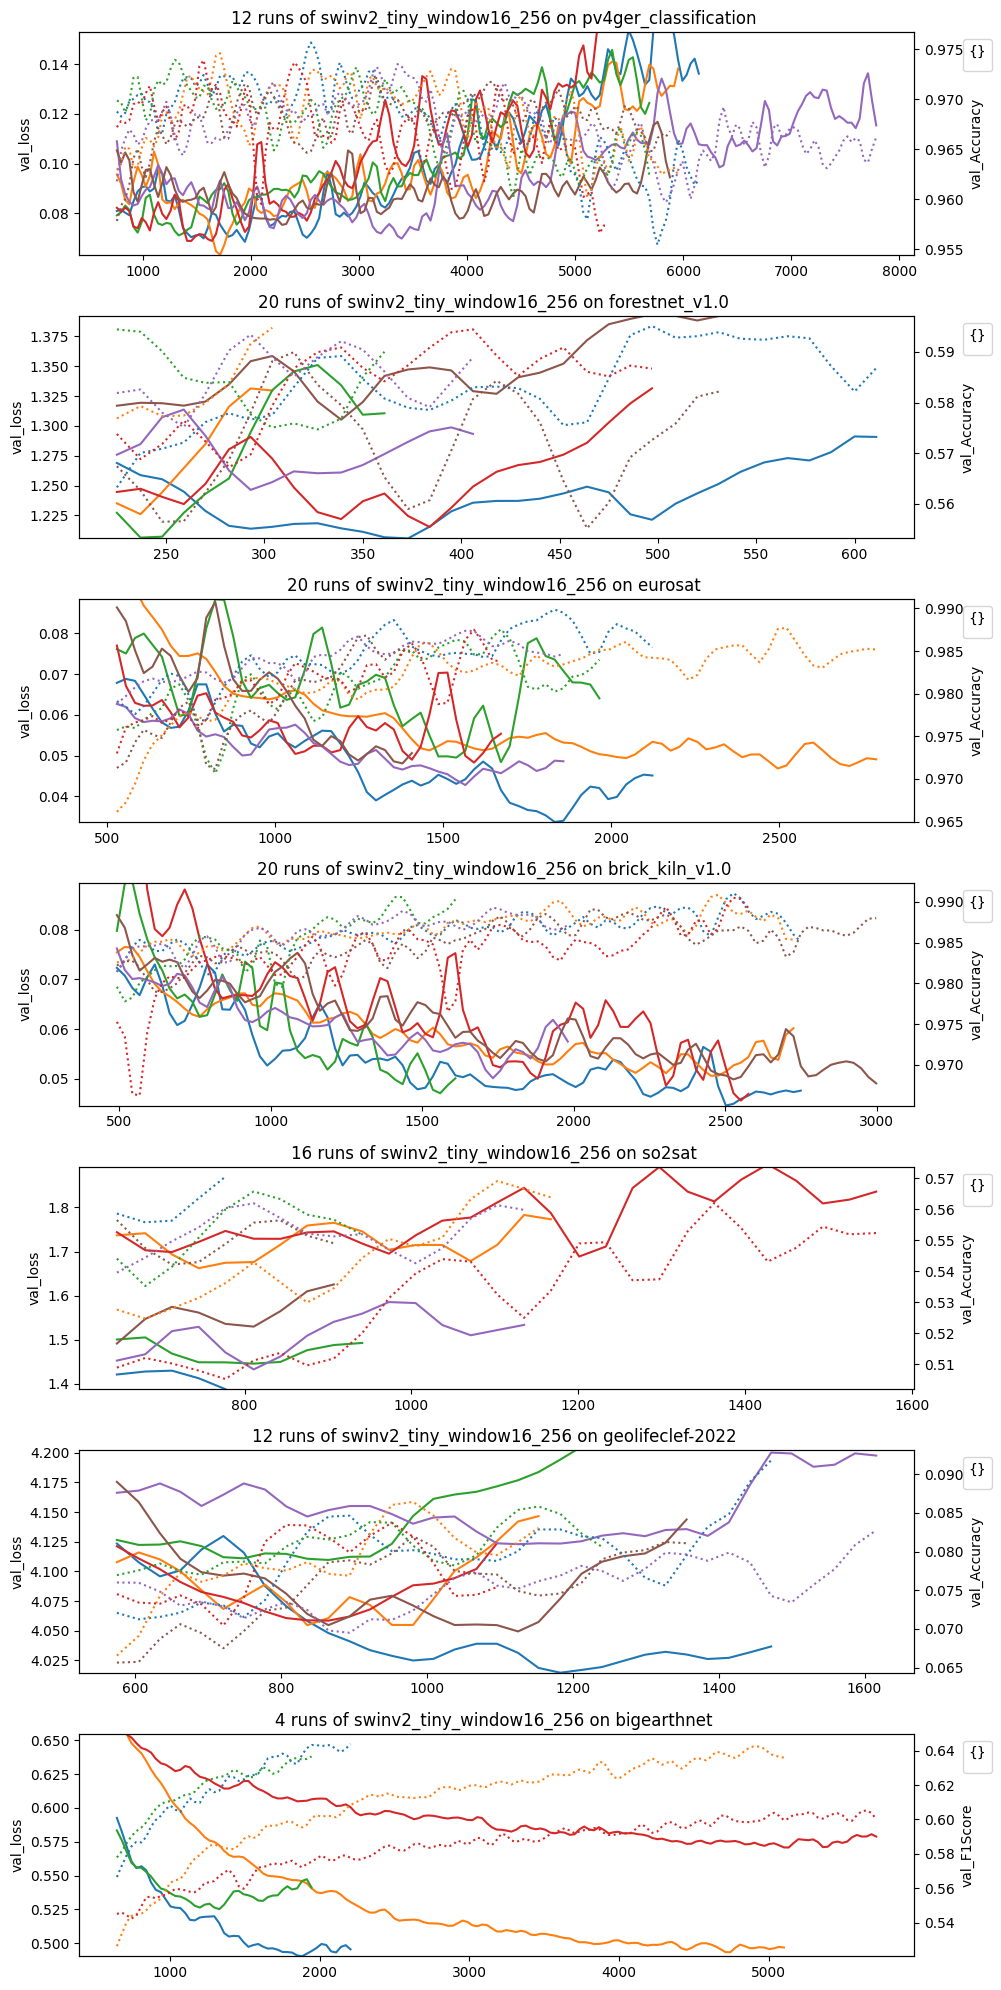

In [15]:

plt.rcParams['figure.figsize'] = [40, 40]

parse_results.plot_all_datasets(df_1x, model="swinv2_tiny_window16_256", plot_fn=parse_results.make_plot_sweep(filt_size=20, top_k=6, legend=True), fig_size=(10,20))
# parse_results.plot_all_datasets(df_1x, model="resnet50")

plt.tight_layout()


In [7]:
df.partition_name.unique()

array(['default', '0.01x_train', '0.02x_train', '0.05x_train'],
      dtype=object)

array(['pv4ger_classification', 'forestnet_v1.0', 'eurosat',
       'brick_kiln_v1.0', 'so2sat', 'geolifeclef-2022', 'bigearthnet'],
      dtype=object)